In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
print(df.shape)
print(df.describe)
print(list(df.columns))

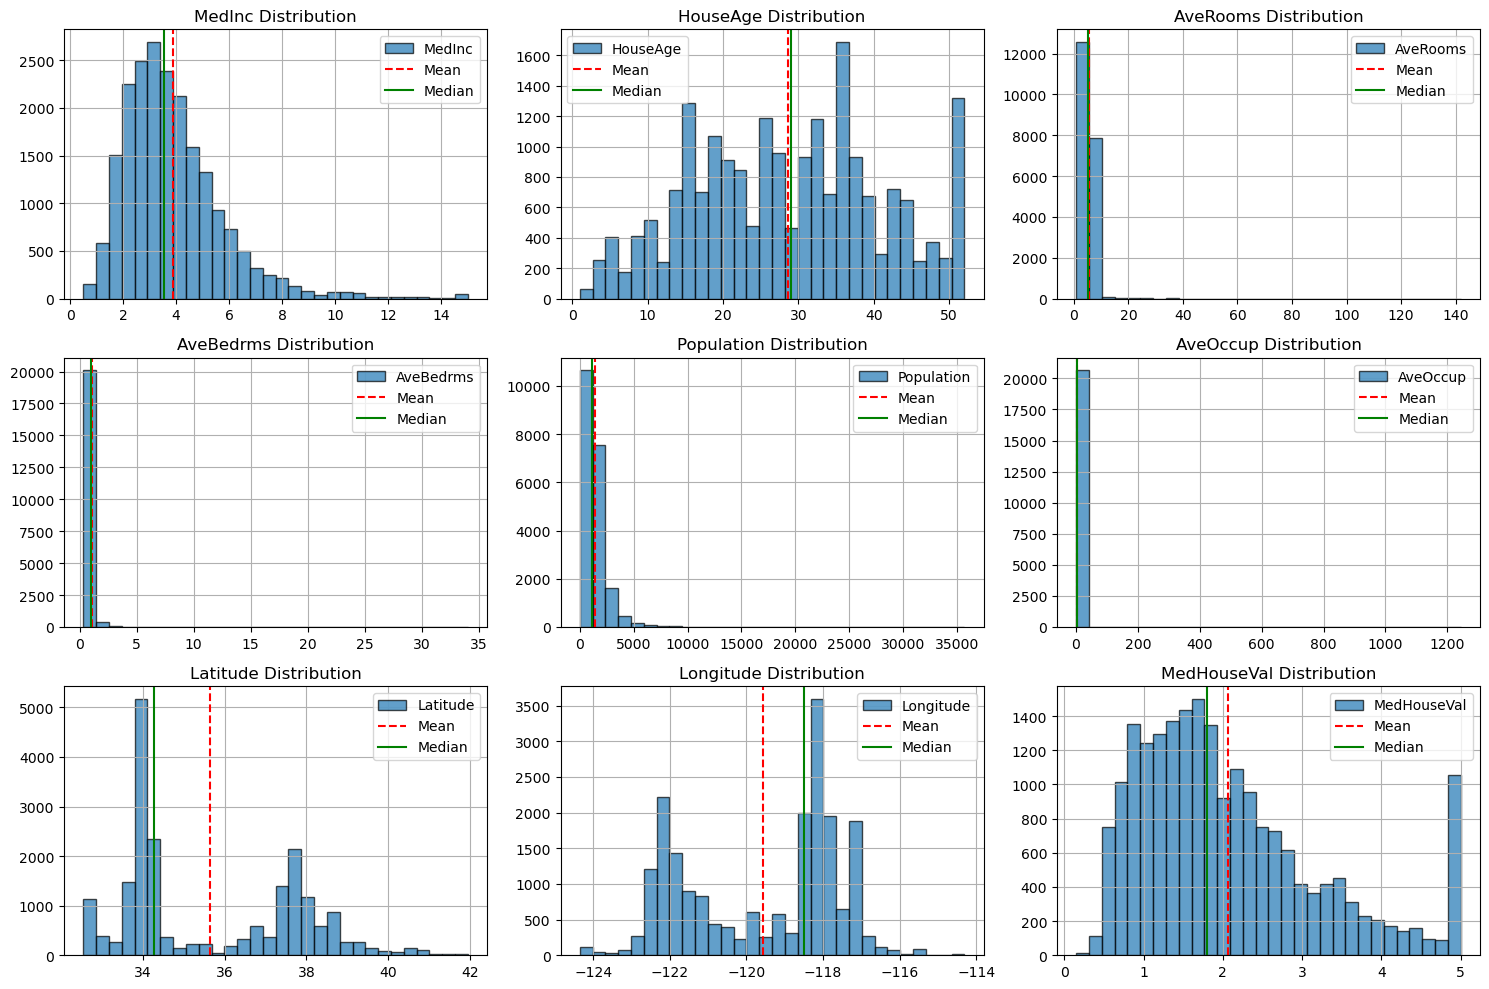

In [21]:
fig, axes = plt.subplots(3,3,figsize=(15,10))
for ax,col in zip(axes.flatten(),df.columns):
    df[col].hist(bins=30, edgecolor='black',ax=ax, alpha=0.7, label=col)
    ax.axvline(df[col].mean(), label='Mean', color='red', linestyle='--')
    ax.axvline(df[col].median(), label='Median',color='green')
    ax.legend()
    ax.set_title(f"{col} Distribution")

plt.tight_layout()

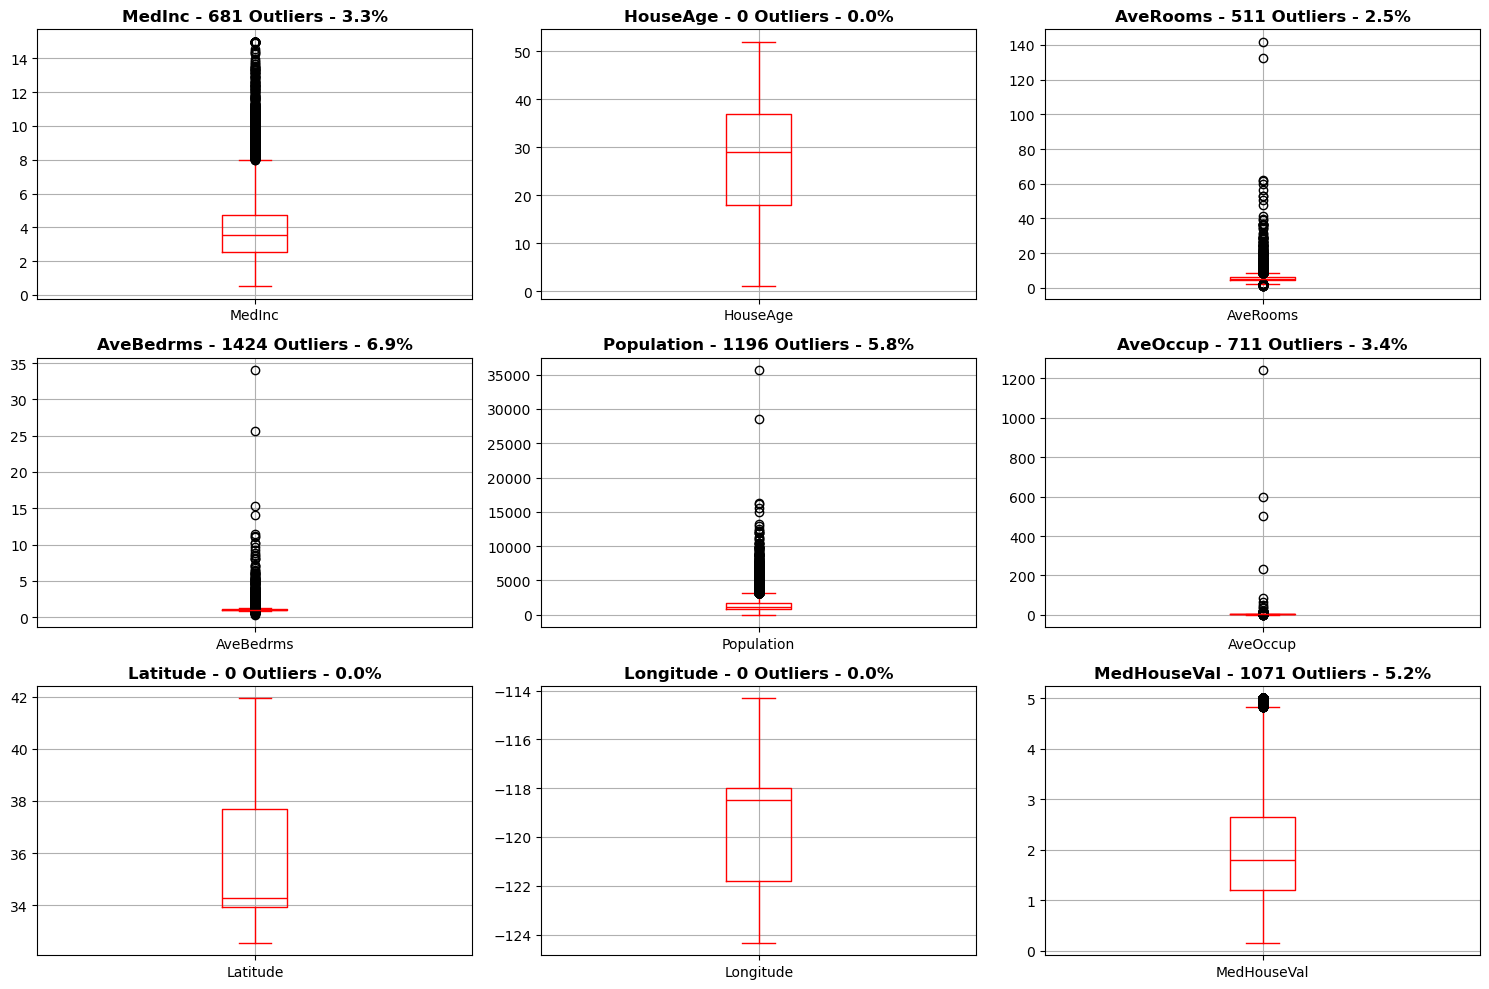

In [22]:
fig,axes = plt.subplots(3,3,figsize=(15,10))
for ax,col in zip(axes.flatten(),df.columns):
    df.boxplot(column=col,ax=ax,color='red')
    q1,q3 = df[col].quantile([0.25,0.75])
    iqr = q3-q1
    outliers = df[(df[col] < (q1-1.5*iqr)) | (df[col] > (q3+1.5*iqr))]
    ax.set_title(f"{col} - {len(outliers)} Outliers - {len(outliers)/len(df):.1%}", fontweight='bold')
plt.tight_layout()